Install library snscrape supaya tidak perlu mengakses langsung Twitter API 

In [1]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Fungsi libbrary langdetect adalah untuk mengimplementasi ulang pustaka deteksi bahasa Google ke Python

In [2]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 26.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=dee3ec5aa088e2e3036548ead1b52df96fdb7eb6c44a42da059895fc48e1ced0
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


Mengimport snscrape modul twitter dan json

In [3]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

Menentukan sesuatu yang ingin dicari, disini saya mencari data dengan kata kunci Transformes dari tanggal 1 September sampai 3 Oktober dengan batas max tweet 100

In [4]:
keywords=['transformers']
start="2022–09–01"
end ="2022–10–03"
max_num=100
fname='tweet.json' 
languages=['id','en']

Import library pandas untuk membuat tabel

In [5]:
import pandas as pd
datatw=[]

Melakukan proses scrapping tweet berdasarkan data yang sudah ada sebelumnya.

In [6]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                print(line)
                f.write(line)
                f.write('\n')

{"id": 1581968602944925696, "username": "mechazone", "date": "2022-10-17 11:21:21+00:00", "text": "Battle Beasts: Rubberneck Giraffe\n\n#inktober #inktober2022 #battlebeasts #battlebeast #transformers #takara #warrior #monster #sketch #drawing #conceptart #characterdesign #kaiju #keshi #actionfigures #toy #artober #giraffe #cyborg https://t.co/3gU5Ppd0pG", "url": "https://twitter.com/mechazone/status/1581968602944925696"}
{"id": 1581968426725056513, "username": "s3duire", "date": "2022-10-17 11:20:39+00:00", "text": "Hope people can see that Alicent is, and has always been, the only half-decent one among all these nonsense people. \nIf you can't see, go hug transformer. ☺️", "url": "https://twitter.com/s3duire/status/1581968426725056513"}
{"id": 1581968234898595840, "username": "iain1st", "date": "2022-10-17 11:19:53+00:00", "text": "@BlackJackLegacy While it keeps doing the early access model, fuck no", "url": "https://twitter.com/iain1st/status/1581968234898595840"}
{"id": 1581968091

In [7]:
datatw

['Battle Beasts: Rubberneck Giraffe\n\n#inktober #inktober2022 #battlebeasts #battlebeast #transformers #takara #warrior #monster #sketch #drawing #conceptart #characterdesign #kaiju #keshi #actionfigures #toy #artober #giraffe #cyborg https://t.co/3gU5Ppd0pG',
 "Hope people can see that Alicent is, and has always been, the only half-decent one among all these nonsense people. \nIf you can't see, go hug transformer. ☺️",
 '@BlackJackLegacy While it keeps doing the early access model, fuck no',
 'I was the movie Transformer last night!! 昨夜は映画トランスフォーマーを見に行きました！',
 'Mek we sow the U-SEED, wey go RESET our destiny because as dis dey be now, e no dey o... Japa done cast and sapa done overload the transformer. #voteatiku #pdpconnect https://t.co/MIAd0We03C',
 "@bushontheradio Jetfire!!! I always wanted that one, but it was £25 so the closest I got was the transformer section in the Argos catalogue.Not a toy as such I gave my N64 to my nephew's when I upgraded to the next thing, kind of want 

Install library sastrawi untuk mengubah kata ke bentuk dasar

In [8]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 25.9 MB/s 


In [9]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Melakukan proses case folding, stemming, dan filtering

In [10]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatw:

    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove URL
    document_test = re.sub(r'http\S+', '', document_test)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)

    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    documents_clean.append(outputstop)

In [11]:
documents_clean[0:5]

['battle beasts rubberneck giraffe inktober inktober battlebeasts battlebeast transformers takara warrior monster sketch drawing conceptart characterdesign kaiju keshi actionfigures toy artober giraffe cyborg ',
 'hope people can see that alicent is and has always been the only half decent one among all these nonsense people if you can t see go hug transformer ',
 ' while it keeps doing the early access model fuck no',
 'i was the movie transformer last night ',
 'mek we sow the u seed wey go reset our destiny because as dis dey be now e no dey o japa done cast and sapa done overload the transformer voteatiku pdpconnect ']

Metode Tf idf Vectorizer untuk mempertimbangkan apakah data tersebut relevan terhadap isi dokumen

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Metode CountVectorizer untuk menghitung frekuensi data dalam dokumen

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

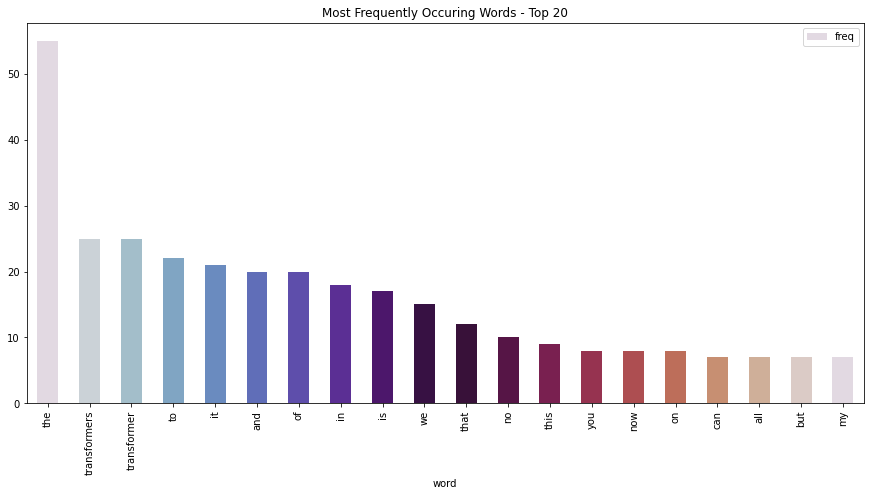

In [13]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

Import library K-means cluster

In [14]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

Menampilkan hasil K-means cluster

In [15]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 the
 transformer
 transformers
 is
 to
 of
 it
 we
 that
 in
Cluster 1:
 you
 amp
 of
 are
 to
 vt
 war
 united
 before
 selflessly
Cluster 2:
 and
 in
 transformers
 it
 the
 on
 to
 this
 my
 transformer




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Memprediksi cluster berdasarkan model yang sudah dibuat

In [16]:
print("Prediction")
Y = cv.transform(["piala dunia"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["ronaldo"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Prediction
Cluster number : [0]
Cluster number : [0]


Menampilkan grafik dendogram dengan orientation top

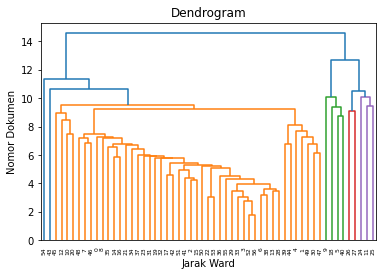

In [17]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

Menampilkan grafik dendogram dengan orientation right

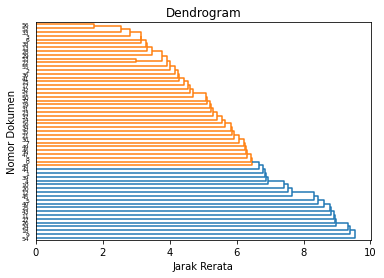

In [18]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

Menampilkan hasil algoritma Agglomerative Clustering

In [19]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 
print(cluster.labels_)

[1 1 1 1 1 2 1 1 1 2 1 0 1 1 1 1 1 1 2 1 1 1 1 1 0 0 5 5 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 4 1 1 1 1 1 1 1 1 1 1 3 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Menggabungkan Cluster dan menampilkan Dendrogram dengan linked single

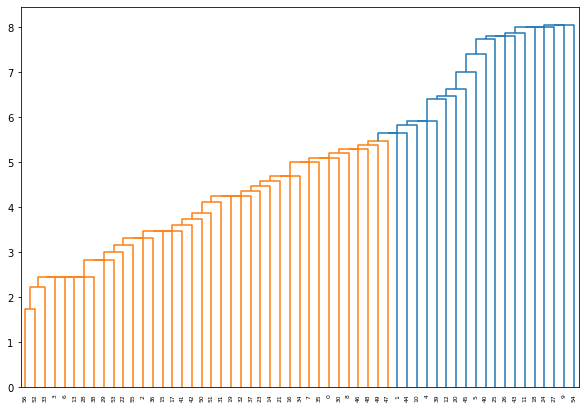

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(0, len(cluster.labels_))

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

Menggabungkan Cluster dan menampilkan Dendrogram dengan linked average

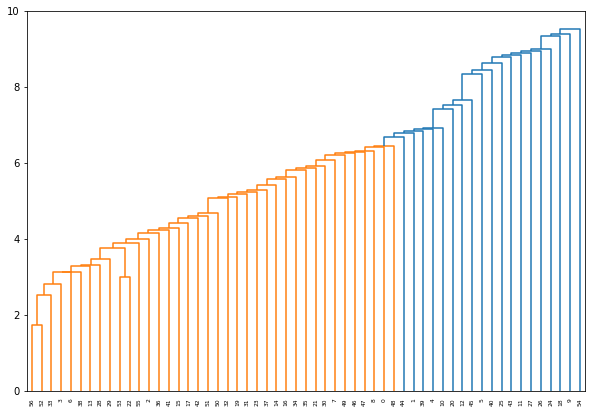

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'average')

labelList = range(0, len(cluster.labels_))

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True);
plt.show()